# DS-210: Programming for Data Science


# Lecture 6:<br>&nbsp;&nbsp;&nbsp;• Ethics of data processing (continued)<br>&nbsp;&nbsp;&nbsp;• Final project expectations<br>&nbsp;&nbsp;&nbsp;• Intro to SciPy


<h1><center>Ethics of Data Processing</center></h1>




* **Lots of data sets have private information**



* **Last time:** infamous examples

  * Enron emails
  
  * AOL search
  
  * Netflix data set
  
  * Cambridge Analytica
  
<br><br>

* Golden State Killer (operated in 1970s and 1980s)
  * DNA database
  * a relative submitted their DNA
  * the search narrowed to a few people


<div align="center">
    <br><b>What do you think about this?</b>
</div>

* **Bottom line:**

  * Be careful publishing any data
  
  * You never know how something might be used
  
  * Respect privacy of subjects

## Final project expectations

   * You pick the topic
      
      
   * Has to be related to graphs
      * either graph data<br>
        (e.g., Stanford Large Network Dataset Collection)
      * or derived graph data
   
   
   * You have to submit a proposal (due 10/17)
      * try to be creative
      * will give you feedback
      * you will have to use Rust

<br><br><br>



**Sample:** Six Degrees of Separation

* Consider a graph in which people who know each other are connected


* **Conjecture:** any pair of people at most 6 steps away from each other


* **Sample problem 1:** find out for a random pairs of people how far they are from each other on a social network


* **Sample problem 2:** What is the average distance between any pair of connected nodes (non connected nodes can be ignored)

## SciPy

* Lots of useful tools for scientific computing


* Highly optimized (uses Fortran, C, C++ under the hood)


* Builds on NumPy (like many other things)

* What we plan to cover

  * Simple example today: interpolation
  * Clustering ($k$-means)
  * Linear algebra (linear regression)
  * Optimization

## Interpolation / Extrapolation

**Data:** known data points

**Goal:** design a function that passes through the data points and also give possible values
  1. between them (interpolation) and
  2. outside of their range (extrapolation)

<div align="center">
    <b>Example of interpolation</b>
    
 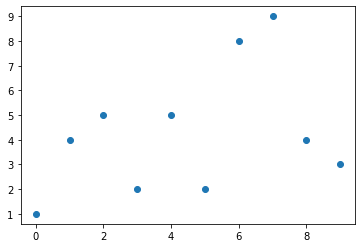
</div>

<div align="center">
    <span class="test">⇓</span> 
 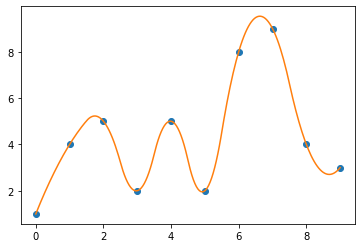
    
</div>

## Example of 1D interpolation



In [6]:
import numpy as np
from scipy.interpolate import interp1d
x = np.arange(10)
y = np.array([1,4,5,2,5,2,8,9,4,3])

# We now compute two functions interpolating the
# data points. Options for kind: cubic, linear, nearest
# previous, next, ...
e = interp1d(x,y,kind='zero')
f = interp1d(x,y,kind='linear')
h = interp1d(x,y,kind='quadratic')
i = interp1d(x,y,kind='cubic')


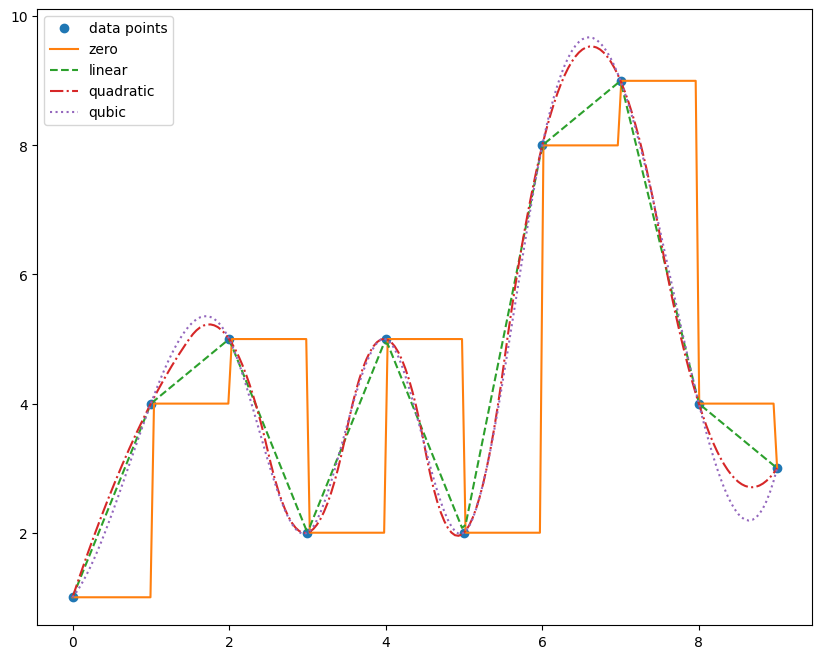

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
xplot = np.linspace(0,9,num=200,endpoint=True)
plt.plot(x,y,'o')
plt.plot(xplot,e(xplot),'-')
plt.plot(xplot,f(xplot),'--')
plt.plot(xplot,h(xplot),'-.')
plt.plot(xplot,i(xplot),':')

plt.legend(['data points','zero', 'linear','quadratic','qubic'],
          loc='upper left');

## Other 1D interpolation functions

* Barycentric Interpolation (Fast Implementation).

* Krogh Interpolation (Can consume values of the derivative as well as the function itself).

* PPoly abd BPoly for higher level polynomials (can be unstable).

## Example of 2D interpolation ($f(x,y) = \sin(x+y) * \cos(x-y)$)

In [51]:
from scipy.interpolate import Rbf
import math

samples = 200
side = 4*math.pi
plot_grid_size = 200

# Sample points and compute the value of f on them
rng = np.random.default_rng()
x = rng.random(samples)*side-side/2
y = rng.random(samples)*side-side/2
z = np.sin(x+y) * np.cos(x-y)

# compute the interpolating function
rbf = Rbf(x, y, z)

# Compute grid points and interpolation values
# for visualization
edges = np.linspace(-side/2, side/2, plot_grid_size+1)
centers = edges[:-1] + (edges[1] - edges[2])/2
# If you want to print without scientific notation
np.set_printoptions(suppress=True)
# Create matrices that replicate the values
# of centers so all combinations can be used
XI, YI = np.meshgrid(centers, centers)
ZI = rbf(XI, YI)
realZI = np.sin(XI+YI) * np.cos(XI-YI)
print(ZI)
print("===============")
print(realZI)
deltaZI = ZI-realZI
print("===============")
print(deltaZI)

[[ 0.785  0.794  0.802 ...  0.016  0.043  0.069]
 [ 0.797  0.808  0.817 ...  0.037  0.064  0.09 ]
 [ 0.809  0.82   0.831 ...  0.058  0.085  0.111]
 ...
 [-0.077 -0.051 -0.024 ... -0.79  -0.792 -0.792]
 [-0.047 -0.021  0.006 ... -0.76  -0.762 -0.764]
 [-0.019  0.007  0.034 ... -0.729 -0.733 -0.736]]
[[-0.063  0.     0.062 ... -0.244 -0.186 -0.125]
 [ 0.     0.063  0.125 ... -0.181 -0.123 -0.062]
 [ 0.062  0.125  0.187 ... -0.119 -0.061  0.   ]
 ...
 [-0.244 -0.181 -0.119 ... -0.426 -0.367 -0.307]
 [-0.186 -0.123 -0.061 ... -0.367 -0.309 -0.248]
 [-0.125 -0.062  0.    ... -0.307 -0.248 -0.187]]
[[ 0.848  0.794  0.74  ...  0.261  0.229  0.194]
 [ 0.797  0.745  0.692 ...  0.218  0.187  0.152]
 [ 0.747  0.695  0.644 ...  0.177  0.146  0.111]
 ...
 [ 0.167  0.13   0.095 ... -0.364 -0.424 -0.486]
 [ 0.139  0.102  0.067 ... -0.392 -0.453 -0.516]
 [ 0.106  0.069  0.034 ... -0.422 -0.485 -0.548]]


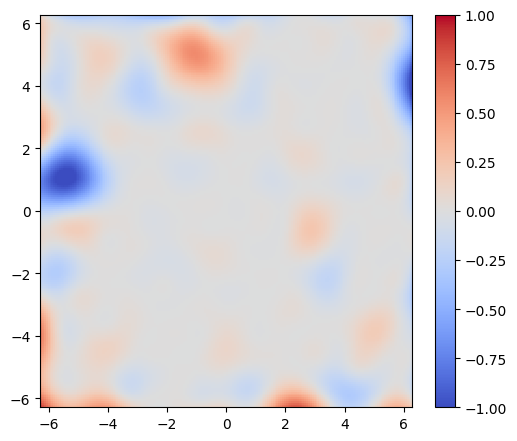

In [52]:
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='coolwarm', vmin=-1, vmax=1)
plt.figure(figsize=(6,5.1))
plt.pcolormesh(X_edges, Y_edges, deltaZI, **lims)
plt.colorbar()
#plt.scatter(x, y, 10, [[0,0,0]])
plt.xlim(-side/2, side/2)
plt.ylim(-side/2, side/2);

* black dots: the points we sampled
* blue to red: interpolation value

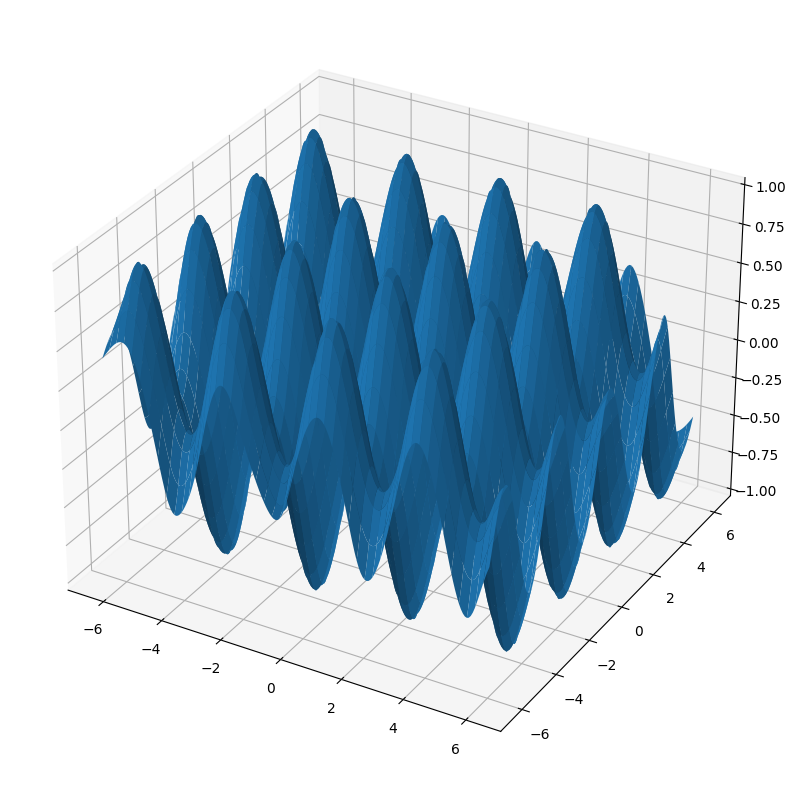

In [34]:
# 3d visualization
import mpl_toolkits
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(XI, YI, ZI)
plt.show();

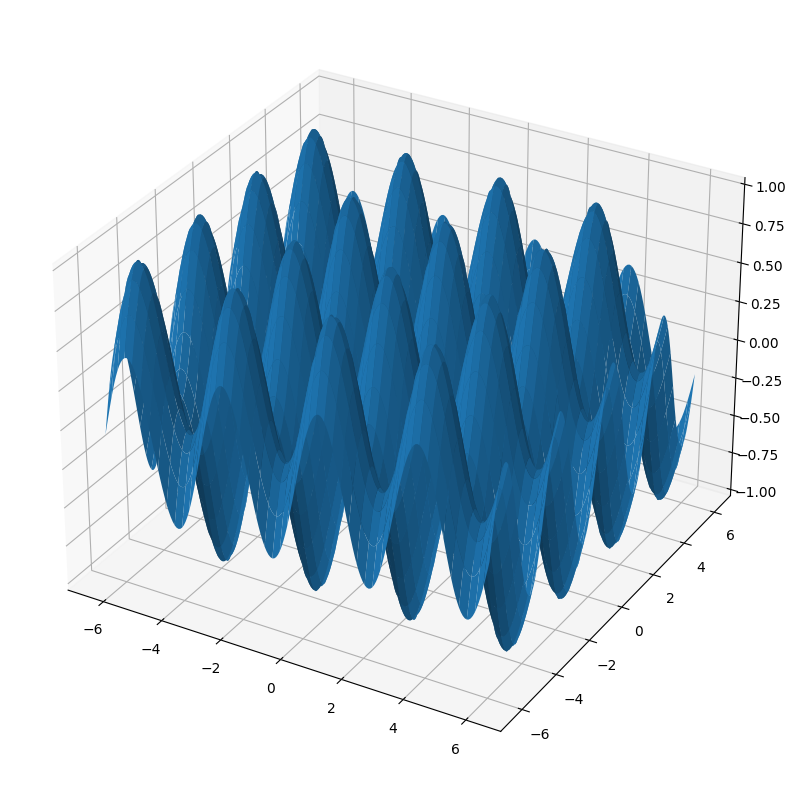

In [35]:
# 3d visualization
import mpl_toolkits
fig = plt.figure(figsize=(10,10))
ax2 = plt.axes(projection='3d')
ax2.plot_surface(XI, YI, realZI)
plt.show();

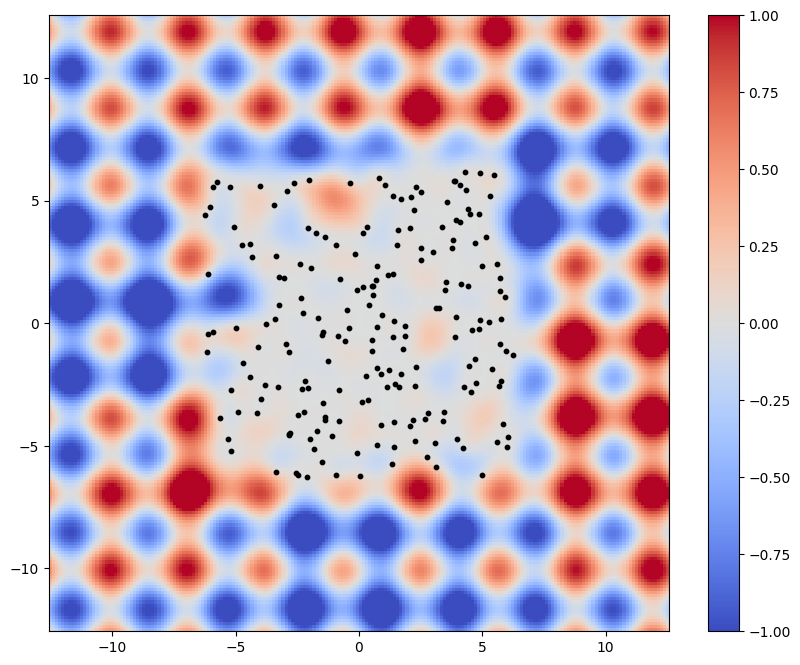

In [53]:
# broader view
side = 8*math.pi
# Compute grid points and interpolation values
edges = np.linspace(-side/2, side/2, plot_grid_size+1)
centers = edges[:-1] + (edges[1] - edges[2])/2
XI, YI = np.meshgrid(centers, centers)
ZI = rbf(XI, YI)
realZI = np.sin(XI+YI) * np.cos(XI-YI)
deltaZI = ZI - realZI
# visualization
X_edges, Y_edges = np.meshgrid(edges, edges)
plt.figure(figsize=(10,8))
plt.pcolormesh(X_edges, Y_edges, deltaZI, **lims)
plt.colorbar()
plt.scatter(x, y, 10, [[0,0,0]])
plt.xlim(-side/2, side/2)
plt.ylim(-side/2, side/2);

## $k$–means

* $k$ is the target number of clusters<br><br>

* **Input:** set $S$ of points in $\mathbb R^n$<br><br>

* **Euclidean between points:**
$$\mbox{dist}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

* **Ideal solution:** set $\mathcal C \subseteq \mathbb R^n$ of $k$ points that minimize
$$\sum_{x \in S} \min_{c \in \mathcal C}
(\mbox{dist}(x,c))^2$$<br><br>
(points in $\mathcal C$ are <i>cluster centers</i>)